In [23]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math

In [31]:
plt.rc('font', size=15)          # controls default text sizes
plt.rc('legend', fontsize=12)

In [32]:
n, k, seed = 500, 30, 0 

In [33]:
# Binning method
from math import ceil
result_binning = {}
for degree in [2, 3, 4, 5, 10, 20]:
    found = 0
    not_found = 0
    print("degree=", degree)
    result_binning[degree] = []
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0]:
        for ratio in [1.1, 1.6, 3.0]:
            cs_bins_range = np.linspace(0.2 * degree ** 2 if degree < 10 else 0.05 * degree ** 2,
                                        degree ** 2 if degree < 10 else 0.5 * degree ** 2, 10)
            cs_bins_range = [ceil(a) for a in cs_bins_range]
            for cs_bins in cs_bins_range:
                for cs_iterations in [1, 2, 3]:
                    for cs_ratio in [1.1, 1.3, 1.5, 1.9, 2.1, 3.0]:
                        path = f"../results_synthetic/binning/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_csratio={cs_ratio}_seed={seed}.json"
                        try:
                            f = open(path)
                            found += 1 
                            data = json.loads(f.read())
                            # print(data)
                            normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                            if normalized_mse < 0.3:
                                result_binning[degree].append((data["measurements"], normalized_mse*100 , data["C"], data["ratio"], data["cs_bins"], data["cs_iteraions"], data["cs_ratio"]))
                                #if data["equality"]==True:
                            #    result_binning[degree].append(data["measurements"])
                        except:
                            not_found+=1
                            # print(f"Could not find {path}")
                            #        f"C={C:.3}_ratio={ratio:.3}_csbins={cs_bins}_csiterations={cs_iterations}_"
                            #        f"csratio={cs_ratio}.json")
    print(f"found {found}, not found {not_found}")


degree= 2
found 5724, not found 1842
degree= 3
found 6804, not found 758
degree= 4
found 7344, not found 216
degree= 5
found 7452, not found 108
degree= 10
found 7487, not found 73
degree= 20
found 7560, not found 0


In [34]:
result_reed_solomon = {}
for degree in [2, 3, 4, 5, 10, 20]:
    print(degree)
    found, not_found = 0, 0
    result_reed_solomon[degree] = []
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0]:
        for ratio in [1.1, 1.6, 3.0]:
            path = f"../results_synthetic/reed_solomon_synthetic/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}.json"
            try:
                f =open(path)
                found +=1
                data = json.loads(f.read())
                normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                if normalized_mse < 0.3:
                    result_reed_solomon[degree].append((data["measurements"], normalized_mse*100))
            except:
                not_found+=1
                #bprint(f"Could not find {path}")
    print(found, not_found)

2
42 0
3
42 0
4
42 0
5
42 0
10
42 0
20
42 0


FileNotFoundError: [Errno 2] No such file or directory: 'plots/reed_solomon/superconduct-n=500_d=2.png'

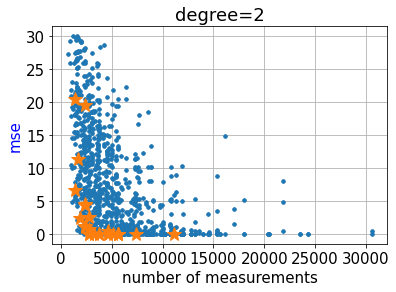

In [35]:
for degree in [2, 3, 4, 5, 10, 20]:  
    fig, ax = plt.subplots()
    ax.set_ylabel("mse", color="blue")
    ax.set_xlabel("number of measurements")
    ax.plot([a[0] for a in result_binning[degree]],[a[1] for a in result_binning[degree]],'.')
    ax.plot([a[0] for a in result_reed_solomon[degree]],[a[1] for a in result_reed_solomon[degree]],'*', markersize=15)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={degree}")
    plt.savefig(f"plots/reed_solomon/superconduct-n={n}_d={degree}", dpi=300)
    plt.show()


In [38]:
# Random measurement method
from math import ceil
result_random = {}
for degree in [2,3,4,5]:
    print(degree)
    result_random[degree] = []
    found, not_found = 0, 0
    for C in [0.05, 0.1, 0.15, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 3.0, 4.0]:
        for ratio in [1.1, 1.6, 3.0]:
            for sampling_factor in list(np.linspace(0.2, 2.0, 10)) + list(np.linspace(2, 6, 10)):
                dir_string=f"../results_synthetic/random_parallel_old/n={n}_k={k}_degree={degree}_C={C:.3}_ratio={ratio:.3}_samplefactor={sampling_factor:.3}_seed={seed}.json"
                try:
                    f =open(dir_string)
                    found += 1
                    data = json.loads(f.read())
                    print(data)
                    normalized_mse = data["mse"]/data['true_fourier_norm_squared']
                    if normalized_mse < 0.3:
                        result_random[degree].append((data["measurements"], normalized_mse*100, data["C"], data["ratio"], data["sampling_factor"]))
                    
                    #if data["equality"]==True:
                    #    result_random[degree].append(data["measurements"])
                except:
                    not_found += 1
                    print(f" Couldn't find {dir_string}")
    print(found, not_found)

2
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.2, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 3.2901763916015625e-05, 'time_cached': 1.239776611328125e-05, 'equality': False, 'mse': 85352, 'true_fourier_norm_squared': 85352, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.4, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 0.00010943412780761719, 'time_cached': 1.5735626220703125e-05, 'equality': False, 'mse': 88652, 'true_fourier_norm_squared': 88652, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree': 2, 'C': 0.05, 'ratio': 1.1, 'sampling_factor': 0.6000000000000001, 'n_cores': 10, 'wait_time': 100, 'time_uncached': 4.267692565917969e-05, 'time_cached': 1.5974044799804688e-05, 'equality': False, 'mse': 85352, 'true_fourier_norm_squared': 85352, 'computed_fourier_norm_squared': 0, 'measurements': 0}
{'n': 500, 'k': 30, 'degree'

 Couldn't find ../results_synthetic/random_parallel_old/n=500_k=30_degree=3_C=4.0_ratio=1.1_samplefactor=3.33_seed=0.json
 Couldn't find ../results_synthetic/random_parallel_old/n=500_k=30_degree=3_C=4.0_ratio=1.1_samplefactor=3.78_seed=0.json
 Couldn't find ../results_synthetic/random_parallel_old/n=500_k=30_degree=3_C=4.0_ratio=1.1_samplefactor=4.22_seed=0.json
 Couldn't find ../results_synthetic/random_parallel_old/n=500_k=30_degree=3_C=4.0_ratio=1.1_samplefactor=4.67_seed=0.json
 Couldn't find ../results_synthetic/random_parallel_old/n=500_k=30_degree=3_C=4.0_ratio=1.1_samplefactor=5.11_seed=0.json
 Couldn't find ../results_synthetic/random_parallel_old/n=500_k=30_degree=3_C=4.0_ratio=1.1_samplefactor=5.56_seed=0.json
 Couldn't find ../results_synthetic/random_parallel_old/n=500_k=30_degree=3_C=4.0_ratio=1.1_samplefactor=6.0_seed=0.json
 Couldn't find ../results_synthetic/random_parallel_old/n=500_k=30_degree=3_C=4.0_ratio=1.6_samplefactor=0.2_seed=0.json
 Couldn't find ../results_

{'n': 500, 'k': 30, 'degree': 5, 'C': 1.4, 'ratio': 1.1, 'sampling_factor': 1.6, 'n_cores': 10, 'wait_time': 1000, 'time_uncached': 16479.72216963768, 'time_cached': 16696.13647699356, 'equality': False, 'mse': 21473.0, 'true_fourier_norm_squared': 105143, 'computed_fourier_norm_squared': 83670.0, 'measurements': 23808}
{'n': 500, 'k': 30, 'degree': 5, 'C': 1.4, 'ratio': 1.1, 'sampling_factor': 1.8, 'n_cores': 10, 'wait_time': 1000, 'time_uncached': 11852.652541160583, 'time_cached': 11055.291501045227, 'equality': False, 'mse': 9409.0, 'true_fourier_norm_squared': 105143, 'computed_fourier_norm_squared': 95734.0, 'measurements': 26688}
{'n': 500, 'k': 30, 'degree': 5, 'C': 1.4, 'ratio': 1.1, 'sampling_factor': 2.0, 'n_cores': 10, 'wait_time': 1000, 'time_uncached': 9962.536083221436, 'time_cached': 9784.496415615082, 'equality': False, 'mse': 3434.0, 'true_fourier_norm_squared': 105143, 'computed_fourier_norm_squared': 121243.0, 'measurements': 29760}
{'n': 500, 'k': 30, 'degree': 5, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


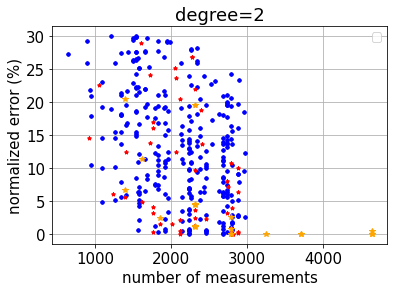

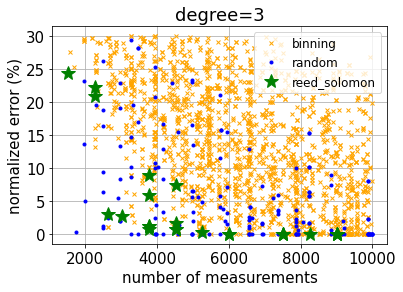

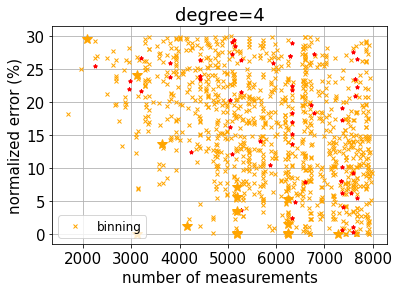

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


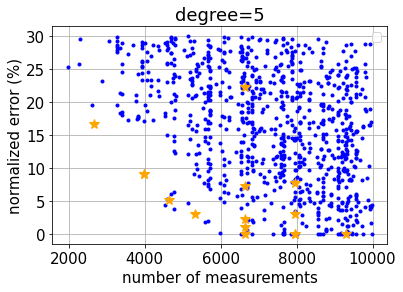

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


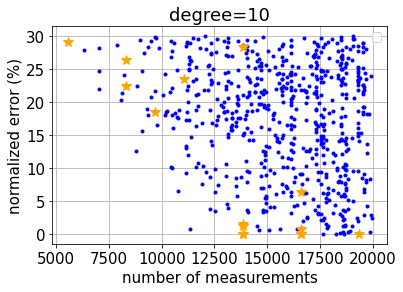

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


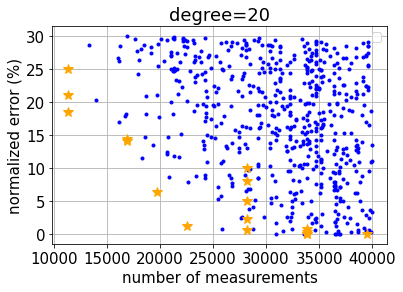

In [37]:
for degree in [2,3,4,5,10,20]:
    fig, ax = plt.subplots()
    ax.set_ylabel("normalized error (%)")
    ax.set_xlabel("number of measurements")
    if degree == 2: 
        ax.plot([a[0] for a in result_binning[degree] if a[0]<3000],[a[1] for a in result_binning[degree] if a[0]<3000],'b.')
        ax.plot([a[0] for a in result_random[degree] if a[0]<3000],[a[1] for a in result_random[degree] if a[0]<3000],'r*', markersize=4)
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<5000],[a[1] for a in result_reed_solomon[degree] if a[0]<5000],'*', color="#FFA500")
    if degree == 3:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<10000],[a[1] for a in result_binning[degree] if a[0]<10000],'x',  color ='#FFA500', markersize =4, label="binning" )
        ax.plot([a[0] for a in result_random[degree] if a[0]<10000],[a[1] for a in result_random[degree] if a[0]<10000], '.', color='b', label="random")
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<10000],[a[1] for a in result_reed_solomon[degree] if a[0]<10000],'*', markersize=15, color='g', label="reed_solomon")
    
    if degree == 4:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<8000],[a[1] for a in result_binning[degree] if a[0]<8000],'x',  color ='#FFA500', markersize =4, label="binning" )
        ax.plot([a[0] for a in result_random[degree] if a[0]<8000],[a[1] for a in result_random[degree] if a[0]<8000],'r*', markersize=4)
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<8000],[a[1] for a in result_reed_solomon[degree] if a[0]<8000],'*', color="#FFA500", markersize=10)
    
    if degree ==5:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<10000],[a[1] for a in result_binning[degree] if a[0]<10000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<10000],[a[1] for a in result_reed_solomon[degree] if a[0]<10000],'*', color="#FFA500", markersize=10)
    
    if degree ==10:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<20000],[a[1] for a in result_binning[degree] if a[0]<20000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<20000],[a[1] for a in result_reed_solomon[degree] if a[0]<20000],'*', color="#FFA500", markersize=10)
    
    if degree ==20:
        ax.plot([a[0] for a in result_binning[degree] if a[0]<40000],[a[1] for a in result_binning[degree] if a[0]<40000],'b.')
        ax.plot([a[0] for a in result_reed_solomon[degree] if a[0]<40000],[a[1] for a in result_reed_solomon[degree] if a[0]<40000],'*', color="#FFA500", markersize=10)
    
    # ax.plot([a[0] for a in result_reed_solomon[depth]],[a[1] for a in result_reed_solomon[depth]],'g*', markersize=4)
    ax.xaxis.grid()
    ax.yaxis.grid()
    ax.set_title(f"degree={degree}")
    plt.legend()
    plt.savefig(f"plots/synthetic_n={n}_d={degree}", dpi=300,  bbox_inches='tight')
    plt.show()

In [ ]:
a = sorted(result_random[4])
print(a)

In [ ]:
a = sorted(result_binning[4])
print(a)

In [16]:
a = sorted(result_reed_solomon[4])
print(a)

[(3120, 0.051851083687649076), (4160, 1.2568702685886135), (5200, 0.008296173390023852), (5200, 0.06636938712019082), (5200, 3.455356216944934), (5200, 5.536658716167167), (5200, 7.180338069065644), (6240, 0.0), (6240, 0.0891838639427564), (6240, 1.511977600331847), (6240, 5.247329669190086), (7280, 0.053925127035155035), (8320, 0.0), (8320, 0.053925127035155035), (10400, 0.0), (10400, 0.0), (10400, 0.0), (11440, 0.0), (12480, 0.0), (12480, 0.0), (12480, 0.0), (12480, 0.0), (16640, 0.0), (24960, 0.0)]
